
# Task-1
02 - Intermediate Level
# Prediction using Decision Tree Algorithm :
Create the Decision Tree classifier and visualize it graphically.



In [139]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

UsageError: unrecognized arguments: # tells python to actually display the graphs


In [141]:
Data = pd.read_csv('iris.csv')

In [142]:
Data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [143]:
Data.shape

(150, 5)

In [144]:
Data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [145]:
# Checking for null Values
Data.isnull().values.any()

False

In [146]:
Data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [147]:
Data.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [148]:
Data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

# Visualization

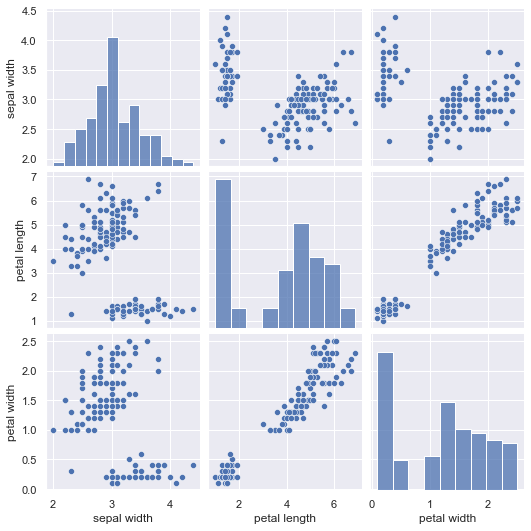

In [149]:
#Pairplot
sns.pairplot(Data.iloc[:,1:])

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

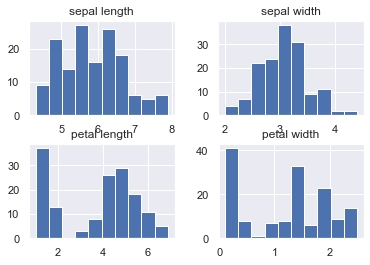

In [150]:
Data.hist()

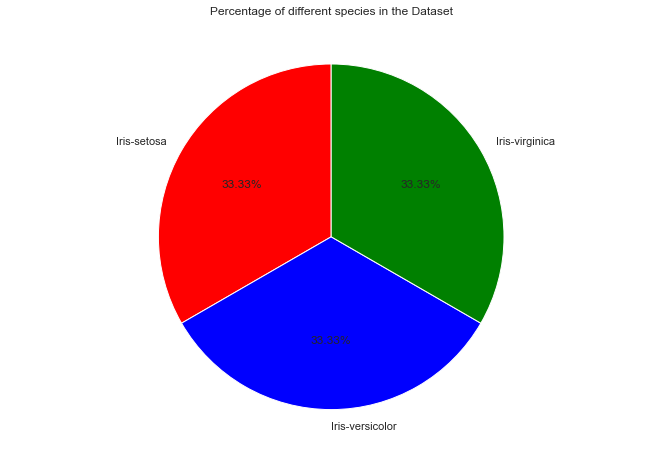

In [151]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['red','blue','green']
sp = Data['class'].unique()
ct = Data['class'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()


In [152]:
# Check the Skewness
Data.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_4840/3277766407.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data.skew()


sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

In [153]:
# Check the dublicates
dupes = Data.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [154]:
# There are no Duplicates

<Figure size 720x360 with 0 Axes>

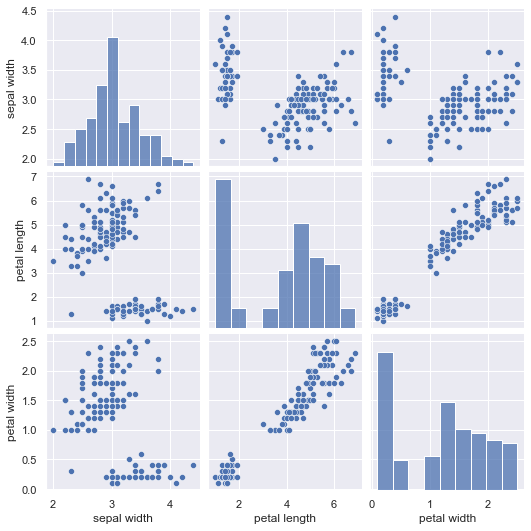

In [155]:
plt.figure(figsize=(10,5))
sns.pairplot(Data.iloc[:,1:])

# Observation:-

1 .Sepal Length and Sepal Width are Normally Distributed.

2 .Petal Length and Petal Width both are rightly Skewed.

<AxesSubplot:>

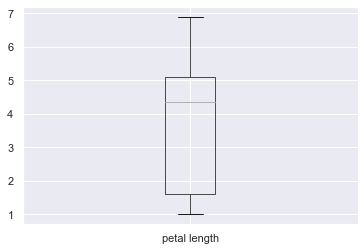

In [156]:
# Boxplot
Data.boxplot(column='petal length')

# Observation:-


1.Q1=1.7

2.Q2=4.4

3.Q3=5.1

In [157]:
#Check Measure of dispersion
Data.quantile(0.75)-Data.quantile(0.25)

sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.5
dtype: float64

# Decision Tree

In [158]:
Data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
Data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [160]:
x = Data.drop('class', axis=1)
y = Data['class']

In [161]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [162]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [163]:
# Scorring our Decision Tree
print(dTree.score(x_test,y_test))

0.9555555555555556


# Accuracy = 95%

In [164]:
y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


# Plotting The Decision Tree

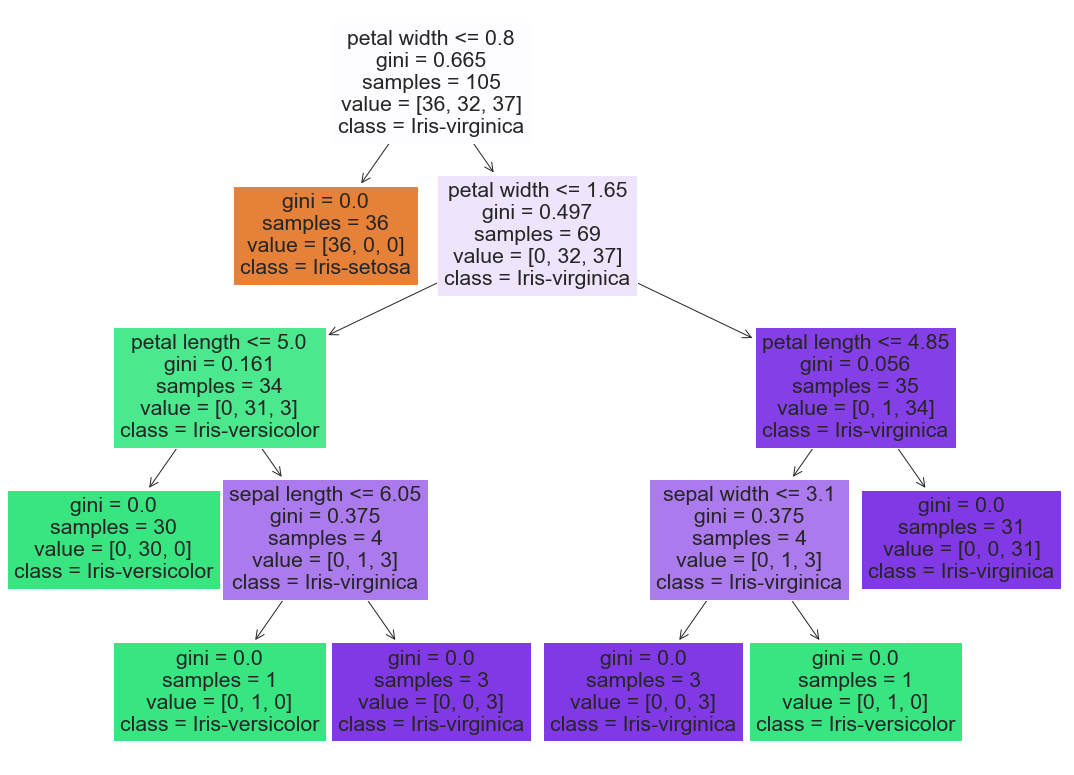

In [165]:
features = Data.columns[:-1]
classes = Data['class'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dTree, feature_names=features, class_names=classes, filled=True)
plt.show()
